In [15]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

# device = "cuda" if torch.cuda.is_available() else "cpu"
device = "cpu"
# print(f"{device}" " is available.")

### Loading CSV Files
The following code block is reading in 2 CSV files of data, both contain data from deployments on different days of distributed air sensors. They contain data for 12 seperate nodes.

In [16]:
# UPLOADING CSV ON COLAB
#from google.colab import files
#data_to_load = input()
# import io
# AF_Data1 = pd.read_csv(io.BytesIO(data_to_load['2021_06_29_AirQ_headers.csv']))
# AF_Data2 = pd.read_csv(io.BytesIO(data_to_load['2021_07_01_AirQ_headers.csv']))

#UPLOADING FILES LOCALLY
AF_Data1 = pd.read_csv("AF_Data/2021_06_29_AirQ_headers.csv")
AF_Data2 = pd.read_csv("AF_Data/2021_07_01_AirQ_headers.csv")

### Function for plotting DF data

In [17]:
import plotly.graph_objs as go
from plotly.offline import iplot

def plot_dataset(df, title, field):
    data = []
    
    value = go.Scatter(
        x=df.index,
        y=df[field],
        mode="lines",
        name="values",
        marker=dict(),
        text=df.index,
        line=dict(color="rgba(0,0,0, 0.3)"),
    )
    data.append(value)

    layout = dict(
        title=title,
        xaxis=dict(title="Date", ticklen=5, zeroline=False),
        yaxis=dict(title="Value", ticklen=5, zeroline=False),
    )

    fig = dict(data=data, layout=layout)
    iplot(fig)
    

### Modifying date time of samples

In order to teach a model time series data, each node will be moved to a day of it's own. This will result in "24 days" worth of data from the two days we have data from

In [18]:
# Replace epoch time with DateTime in DF
AF_Data1['Teensy Server Time'] = AF_Data1['Teensy Server Time'].apply(lambda x: datetime.datetime.fromtimestamp(x))
AF_Data2['Teensy Server Time'] = AF_Data2['Teensy Server Time'].apply(lambda x: datetime.datetime.fromtimestamp(x))

# Move time stamp of second dataset 9 days in the future to avoid overlap
AF_Data2['Teensy Server Time'] = AF_Data2['Teensy Server Time'].apply(lambda x: x + datetime.timedelta(days=9))

# Seperate measurements of seperate node data into their own day
num_nodes = 12
for i in range(2,num_nodes+1):
    AF_Data1.loc[AF_Data1['Node ID'] == i, "Teensy Server Time"] += datetime.timedelta(days=i-1)
    AF_Data2.loc[AF_Data2['Node ID'] == i, "Teensy Server Time"] += datetime.timedelta(days=i-1)

frames = [AF_Data1, AF_Data2]
AF_Data = pd.concat(frames)

# Set the index to the time of sample
AF_Data = AF_Data.set_index(['Teensy Server Time'])
AF_Data.index = pd.to_datetime(AF_Data.index)
if not AF_Data.index.is_monotonic:
    AF_Data = AF_Data.sort_index()


### Removing outliers from data
Due to cost constraint on the distributed nodes it is known that certain sensors can have somewhat inconsistent measurements or NaN measurements. I am handling this by finding outlier data points and replacing them with the average measurement

In [19]:
rate = 7
# TEMP DATA
mean_temp = AF_Data['Temp'].mean()
std = AF_Data['Temp'].std()
outliers = (AF_Data['Temp'] - mean_temp).abs() > std*rate
AF_Data.loc[outliers, 'Temp'] = np.nan
AF_Data['Temp'].fillna(mean_temp, inplace=True)

# HUMIDITY DATA
mean_temp = AF_Data['Humidity'].mean()
std = AF_Data['Humidity'].std()
outliers = (AF_Data['Humidity'] - mean_temp).abs() > std*rate
AF_Data.loc[outliers, 'Humidity'] = np.nan
AF_Data['Humidity'].fillna(mean_temp, inplace=True)

# SOUND DATA
mean_temp = AF_Data['Sound'].mean()
std = AF_Data['Sound'].std()
outliers = (AF_Data['Sound'] - mean_temp).abs() > std*rate
AF_Data.loc[outliers, 'Sound'] = np.nan
AF_Data['Sound'].fillna(mean_temp, inplace=True)

# C02 DATA
mean_temp = AF_Data['CO2'].mean()
std = AF_Data['CO2'].std()
outliers = (AF_Data['CO2'] - mean_temp).abs() > std*rate
AF_Data.loc[outliers, 'CO2'] = np.nan
AF_Data['CO2'].fillna(mean_temp, inplace=True)

# PM1 DATA
mean_temp = AF_Data['PM1'].mean()
std = AF_Data['PM1'].std()
outliers = (AF_Data['PM1'] - mean_temp).abs() > std*rate
AF_Data.loc[outliers, 'PM1'] = np.nan
AF_Data['PM1'].fillna(mean_temp, inplace=True)

# PM2.5 DATA
mean_temp = AF_Data['PM2.5'].mean()
std = AF_Data['PM2.5'].std()
outliers = (AF_Data['PM2.5'] - mean_temp).abs() > std*rate
AF_Data.loc[outliers, 'PM2.5'] = np.nan
AF_Data['PM2.5'].fillna(mean_temp, inplace=True)

# PM10 DATA
mean_temp = AF_Data['PM10'].mean()
std = AF_Data['PM10'].std()
outliers = (AF_Data['PM10'] - mean_temp).abs() > std*rate
AF_Data.loc[outliers, 'PM10'] = np.nan
AF_Data['PM10'].fillna(mean_temp, inplace=True)

# VOC DATA
mean_temp = AF_Data['VOC'].mean()
std = AF_Data['VOC'].std()
outliers = (AF_Data['VOC'] - mean_temp).abs() > std*rate
AF_Data.loc[outliers, 'VOC'] = np.nan
AF_Data['VOC'].fillna(mean_temp, inplace=True)

### Numpy

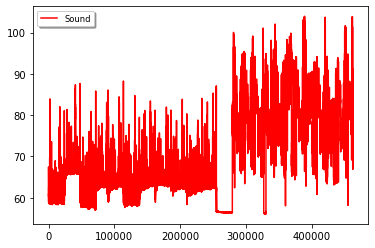

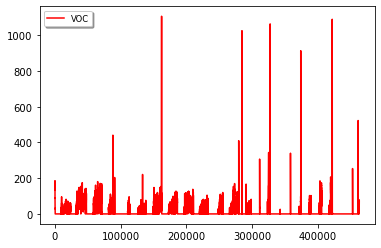

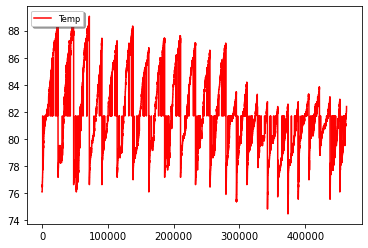

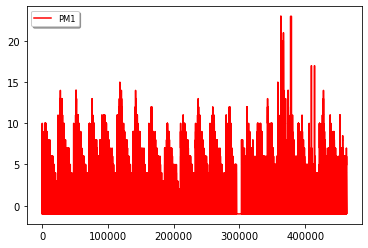

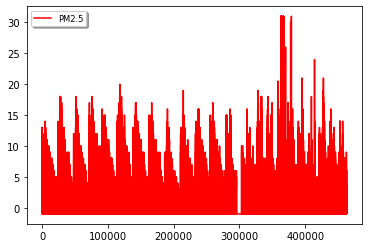

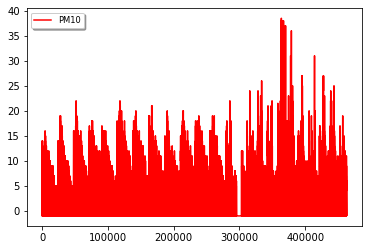

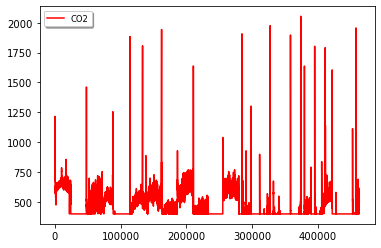

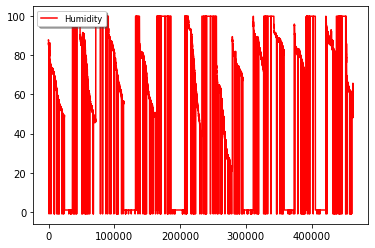

In [20]:
sound = AF_Data['Sound'].to_numpy()
fig, ax = plt.subplots(1, 1)
c=ax.plot(sound,'r',label='Sound')
l = ax.legend(loc='upper left', shadow=True, fontsize='small')

voc = AF_Data['VOC'].to_numpy()
fig, ax = plt.subplots(1, 1)
c=ax.plot(voc,'r',label='VOC')
l = ax.legend(loc='upper left', shadow=True, fontsize='small')

temp = AF_Data['Temp'].to_numpy()
fig, ax = plt.subplots(1, 1)
c=ax.plot(temp,'r',label='Temp')
l = ax.legend(loc='upper left', shadow=True, fontsize='small')

pm1 = AF_Data['PM1'].to_numpy()
fig, ax = plt.subplots(1, 1)
c=ax.plot(pm1,'r',label='PM1')
l = ax.legend(loc='upper left', shadow=True, fontsize='small')

pm25 = AF_Data['PM2.5'].to_numpy()
fig, ax = plt.subplots(1, 1)
c=ax.plot(pm25,'r',label='PM2.5')
l = ax.legend(loc='upper left', shadow=True, fontsize='small')

pm10 = AF_Data['PM10'].to_numpy()
fig, ax = plt.subplots(1, 1)
c=ax.plot(pm10,'r',label='PM10')
l = ax.legend(loc='upper left', shadow=True, fontsize='small')

co2 = AF_Data['CO2'].to_numpy()
fig, ax = plt.subplots(1, 1)
c=ax.plot(co2,'r',label='CO2')
l = ax.legend(loc='upper left', shadow=True, fontsize='small')

hum = AF_Data['Humidity'].to_numpy()
fig, ax = plt.subplots(1, 1)
c=ax.plot(hum,'r',label='Humidity')
l = ax.legend(loc='upper left', shadow=True, fontsize='small')

### Generating cyclical time features
Sin and Cos transforms of time features

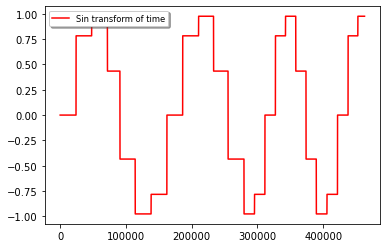

In [21]:
def generate_cyclical_features(df, col_name, period, start_num=0):
    kwargs = {
        f'sin_{col_name}' : lambda x: np.sin(2*np.pi*(df[col_name]-start_num)/period),
        f'cos_{col_name}' : lambda x: np.cos(2*np.pi*(df[col_name]-start_num)/period)    
             }
    return df.assign(**kwargs).drop(columns=[col_name])

AF_Data = (
                AF_Data
                .assign(minute = AF_Data.index.minute)
                .assign(hour = AF_Data.index.hour)
                .assign(day_of_week = AF_Data.index.dayofweek)
              )

AF_Data = generate_cyclical_features(AF_Data, 'minute', 60, 0)
AF_Data = generate_cyclical_features(AF_Data, 'hour', 24, 0)
AF_Data = generate_cyclical_features(AF_Data, 'day_of_week', 7, 0)

hum = AF_Data['sin_day_of_week'].to_numpy()
fig, ax = plt.subplots(1, 1)
c=ax.plot(hum,'r',label='Sin transform of time')
l = ax.legend(loc='upper left', shadow=True, fontsize='small')

### Creating dataloaders

First uneccesarry fields are dropped from the DF

Second the DF are split into feature data and label data, then the data and labels are proportionally split into training, test and validation sets

Third the data are set to be tensors which then are used to create dataloader objects of the data

The get_data_loader function will create the correct dataloader objects when passed with a valid field name as input that will be used as the label for the dataset.

In [22]:
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# removing Rpi Time and node id from dataset
AF_Data = AF_Data.drop(columns='Rpi Time')
AF_Data = AF_Data.drop(columns='Node ID')

def feature_label_split(df, target_col):
    y = df[[target_col]]
    X = df.drop(columns=[target_col])
    return X, y

def train_val_test_split(df, target_col, test_ratio):
    val_ratio = test_ratio / (1 - test_ratio)
    X, y = feature_label_split(df, target_col)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, shuffle=False)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_ratio, shuffle=False)
    return X_train, X_val, X_test, y_train, y_val, y_test

def get_data_loader(field):
   X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(AF_Data, field, 0.1)

   # SCALING DATA
   scaler = StandardScaler()
   X_train_arr = scaler.fit_transform(X_train)
   X_val_arr = scaler.transform(X_val)
   X_test_arr = scaler.transform(X_test)

   y_train_arr = scaler.fit_transform(y_train)
   y_val_arr = scaler.transform(y_val)
   y_test_arr = scaler.transform(y_test)

   batch_size = 64

   # CREATING TENSORS
   train_features = torch.Tensor(X_train_arr)
   train_targets = torch.Tensor(y_train_arr)
   val_features = torch.Tensor(X_val_arr)
   val_targets = torch.Tensor(y_val_arr)
   test_features = torch.Tensor(X_test_arr)
   test_targets = torch.Tensor(y_test_arr)

   if torch.cuda.is_available():
      train_features = train_features.to(device)
      train_targets = train_targets.to(device) 
      val_features = val_features.to(device)
      val_targets = val_targets.to(device) 
      test_features = test_features.to(device) 
      test_targets = test_targets.to(device)  
   

   train = TensorDataset(train_features, train_targets)
   val = TensorDataset(val_features, val_targets)
   test = TensorDataset(test_features, test_targets)

   # CREATING DATALOADERS
   train_loader = DataLoader(train, batch_size=batch_size, shuffle=False, drop_last=True)
   val_loader = DataLoader(val, batch_size=batch_size, shuffle=False, drop_last=True)
   test_loader = DataLoader(test, batch_size=batch_size, shuffle=False, drop_last=True)
   test_loader_one = DataLoader(test, batch_size=1, shuffle=False, drop_last=True)
   return X_train, X_test, train_loader, val_loader, test_loader_one, scaler

### RNN Class definition

In [23]:
class RNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, dropout_prob):
        super(RNNModel, self).__init__()

        # Defining the number of layers and the nodes in each layer
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim

        # RNN layers
        self.rnn = nn.RNN(
            input_dim, hidden_dim, layer_dim, batch_first=True, dropout=dropout_prob
        )
        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    # Forward propagation on input tensor(x)
    def forward(self, x):
        # Initializing hidden state for first input with zeros
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim, device=torch.device(device)).requires_grad_()
        #h0 = h0.to(device)

        # Forward propagation by passing in the input and hidden state into the model
        out, h0 = self.rnn(x, h0.detach())

        # Reshaping the outputs in the shape of (batch_size, seq_length, hidden_size)
        out = out[:, -1, :]

        # Convert the final state to desired output shape (batch_size, output_dim)
        out = self.fc(out)
        return out

In [24]:
# Helper class for training and making predictions
class Optimization:
    # Arguments are model, loss function and the optimizer
    def __init__(self, model, loss_fn, optimizer):
        self.model = model
        self.loss_fn = loss_fn
        self.optimizer = optimizer
        self.train_losses = []
        self.val_losses = []
    
    # Complete one step of training with features (x) and label (y)
    def train_step(self, x, y):
        # Sets model to train mode
        self.model.train()

        # Makes predictions
        yhat = self.model(x)

        # Computes loss
        loss = self.loss_fn(y, yhat)

        # Computes gradients
        loss.backward()

        # Updates parameters and zeroes gradients
        self.optimizer.step()
        self.optimizer.zero_grad()

        # Returns the loss
        return loss.item()

    # Function to complete model training
    # train_loader is the DataLoader for training data
    # val_loader is the DataLoader for validation data
    # Computes and prints validation and training loss
    def train(self, train_loader, val_loader, batch_size=64, n_epochs=25, n_features=1):
        for epoch in range(1, n_epochs + 1):
            batch_losses = []
            for x_batch, y_batch in train_loader:
                x_batch = x_batch.view([batch_size, -1, n_features]).to(device)
                y_batch = y_batch.to(device)
                loss = self.train_step(x_batch, y_batch)
                batch_losses.append(loss)
            training_loss = np.mean(batch_losses)
            self.train_losses.append(training_loss)

            with torch.no_grad():
                batch_val_losses = []
                for x_val, y_val in val_loader:
                    x_val = x_val.view([batch_size, -1, n_features]).to(device)
                    y_val = y_val.to(device)
                    self.model.eval()
                    yhat = self.model(x_val)
                    val_loss = self.loss_fn(y_val, yhat).item()
                    batch_val_losses.append(val_loss)
                validation_loss = np.mean(batch_val_losses)
                self.val_losses.append(validation_loss)

            print(
                f"[{epoch}/{n_epochs}] Training loss: {training_loss:.4f}\t Validation loss: {validation_loss:.4f}"
            )


    def evaluate(self, test_loader, batch_size=1, n_features=1):
        with torch.no_grad():
            predictions = []
            values = []
            for x_test, y_test in test_loader:
                x_test = x_test.view([batch_size, -1, n_features]).to(device)
                y_test = y_test.to(device)
                self.model.eval()
                yhat = self.model(x_test)
                predictions.append(yhat.to(device).detach().numpy())
                values.append(y_test.to(device).detach().numpy())

        return predictions, values

    # Plotting training and validation loss
    def plot_losses(self):
        plt.plot(self.train_losses, label="Training loss")
        plt.plot(self.val_losses, label="Validation loss")
        plt.legend()
        plt.title("Losses")
        plt.show()
        plt.close()

### Creating RNN Model and training with Temperature as a label

[1/25] Training loss: 0.1078	 Validation loss: 0.2903
[2/25] Training loss: 0.1346	 Validation loss: 0.3821
[3/25] Training loss: 0.1204	 Validation loss: 0.3339
[4/25] Training loss: 0.1242	 Validation loss: 0.4533
[5/25] Training loss: 0.1389	 Validation loss: 0.7989
[6/25] Training loss: 0.1157	 Validation loss: 0.3309
[7/25] Training loss: 0.1184	 Validation loss: 1.8909
[8/25] Training loss: 0.1094	 Validation loss: 1.2263
[9/25] Training loss: 0.1240	 Validation loss: 1.1765
[10/25] Training loss: 0.1176	 Validation loss: 0.3962
[11/25] Training loss: 0.1275	 Validation loss: 0.3226
[12/25] Training loss: 0.1236	 Validation loss: 0.2955
[13/25] Training loss: 0.1121	 Validation loss: 0.2771
[14/25] Training loss: 0.1043	 Validation loss: 0.2450
[15/25] Training loss: 0.0960	 Validation loss: 0.2407
[16/25] Training loss: 0.0922	 Validation loss: 0.2286
[17/25] Training loss: 0.0720	 Validation loss: 0.2484
[18/25] Training loss: 0.0641	 Validation loss: 0.2205
[19/25] Training lo

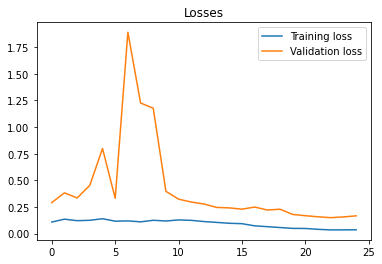

In [25]:
import torch.optim as optim

X_train, X_test, train_loader, val_loader, test_loader_one, scaler = get_data_loader("Temp")

input_dim = len(X_train.columns)
output_dim = 1
hidden_dim = 64
layer_dim = 3
batch_size = 64
dropout = 0.2
n_epochs = 25
learning_rate = 1e-3
weight_decay = 1e-6

model_params = {'input_dim': input_dim,
                'hidden_dim' : hidden_dim,
                'layer_dim' : layer_dim,
                'output_dim' : output_dim,
                'dropout_prob' : dropout}

model = RNNModel(**model_params)

if torch.cuda.is_available():
   model.to(device)

loss_fn = nn.MSELoss(reduction="mean")
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)


opt = Optimization(model=model, loss_fn=loss_fn, optimizer=optimizer)
opt.train(train_loader, val_loader, batch_size=batch_size, n_epochs=n_epochs, n_features=input_dim)
opt.plot_losses()

predictions, values = opt.evaluate(
    test_loader_one,
    batch_size=1,
    n_features=input_dim
)

### Temperature Predictions from RNN

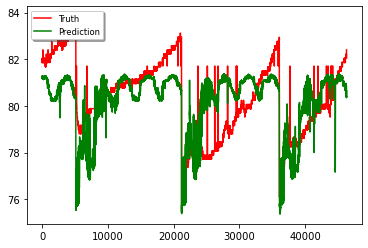

In [26]:
def inverse_transform(scaler, df, columns):
    for col in columns:
        df[col] = scaler.inverse_transform(df[col])
    return df


def format_predictions(predictions, values, df_test, scaler):
    vals = np.concatenate(values, axis=0).ravel()
    preds = np.concatenate(predictions, axis=0).ravel()
    df_result = pd.DataFrame(data={"value": vals, "prediction": preds}, index=df_test.head(len(vals)).index)
    df_result = df_result.sort_index()
    df_result = inverse_transform(scaler, df_result, [["value", "prediction"]])
    return df_result

df_result = format_predictions(predictions, values, X_test, scaler)
df_result
truth = df_result['value'].to_numpy()
prediction = df_result['prediction'].to_numpy()
fig, ax = plt.subplots(1, 1)
c=ax.plot(truth,'r',label='Truth')
c=ax.plot(prediction,'g',label='Prediction')
l = ax.legend(loc='upper left', shadow=True, fontsize='small')

### Defining LSTM Class

In [27]:
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, dropout_prob):
        super(LSTMModel, self).__init__()

        # number of layers and the nodes in each layer
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim

        # LSTM layers
        self.lstm = nn.LSTM(
            input_dim, hidden_dim, layer_dim, batch_first=True, dropout=dropout_prob
        )

        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Initializing hidden state for first input with zeros
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()

        # Initializing cell state for first input with zeros
        c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()

        # Forward propagation by passing in the input, hidden state, and cell state into the model
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

        # Reshaping the outputs in the shape of (batch_size, seq_length, hidden_size)
        out = out[:, -1, :]

        # Convert the final state to shape (batch_size, output_dim)
        out = self.fc(out)

        return out

### LSTM Training of temp data

[1/25] Training loss: 0.1500	 Validation loss: 0.1240
[2/25] Training loss: 0.0669	 Validation loss: 0.1232
[3/25] Training loss: 0.0613	 Validation loss: 0.0925
[4/25] Training loss: 0.0497	 Validation loss: 0.1009
[5/25] Training loss: 0.0445	 Validation loss: 0.0985
[6/25] Training loss: 0.0394	 Validation loss: 0.1014
[7/25] Training loss: 0.0352	 Validation loss: 0.1044
[8/25] Training loss: 0.0317	 Validation loss: 0.0958
[9/25] Training loss: 0.0315	 Validation loss: 0.0997
[10/25] Training loss: 0.0317	 Validation loss: 0.1163
[11/25] Training loss: 0.0293	 Validation loss: 0.1201
[12/25] Training loss: 0.0265	 Validation loss: 0.1321
[13/25] Training loss: 0.0245	 Validation loss: 0.1043
[14/25] Training loss: 0.0232	 Validation loss: 0.1225
[15/25] Training loss: 0.0214	 Validation loss: 0.0935
[16/25] Training loss: 0.0203	 Validation loss: 0.1215
[17/25] Training loss: 0.0195	 Validation loss: 0.0987
[18/25] Training loss: 0.0187	 Validation loss: 0.1301
[19/25] Training lo

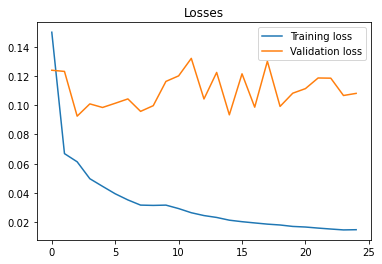

In [28]:
import torch.optim as optim

X_train, X_test, train_loader, val_loader, test_loader_one, scaler = get_data_loader("Temp")

input_dim = len(X_train.columns)
output_dim = 1
hidden_dim = 64
layer_dim = 3
batch_size = 64
dropout = 0.2
n_epochs = 25
learning_rate = 1e-3
weight_decay = 1e-6

model_params = {'input_dim': input_dim,
                'hidden_dim' : hidden_dim,
                'layer_dim' : layer_dim,
                'output_dim' : output_dim,
                'dropout_prob' : dropout}

model = LSTMModel(**model_params)

if torch.cuda.is_available():
   model.to(device)

loss_fn = nn.MSELoss(reduction="mean")
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)


opt = Optimization(model=model, loss_fn=loss_fn, optimizer=optimizer)
opt.train(train_loader, val_loader, batch_size=batch_size, n_epochs=n_epochs, n_features=input_dim)
opt.plot_losses()

predictions, values = opt.evaluate(
    test_loader_one,
    batch_size=1,
    n_features=input_dim
)

### Temperature predictions LSTM

                         value  prediction
Teensy Server Time                        
2021-07-18 05:45:26  81.860001   81.243698
2021-07-18 05:45:27  81.860001   81.256081
2021-07-18 05:45:28  81.860001   81.256874
2021-07-18 05:45:29  81.860001   81.217010
2021-07-18 05:45:30  81.860001   81.183800
...                        ...         ...
2021-07-21 07:10:19  82.220001   82.282402
2021-07-21 07:10:20  82.400002   82.255844
2021-07-21 07:10:21  82.400002   82.189934
2021-07-21 07:10:22  82.400002   82.152267
2021-07-21 07:10:23  82.400002   82.184349

[46278 rows x 2 columns]


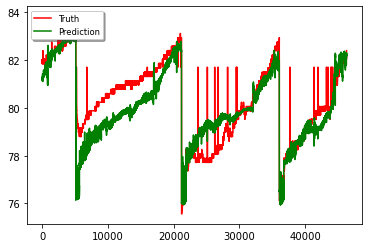

In [29]:
def inverse_transform(scaler, df, columns):
    for col in columns:
        df[col] = scaler.inverse_transform(df[col])
    return df


def format_predictions(predictions, values, df_test, scaler):
    vals = np.concatenate(values, axis=0).ravel()
    preds = np.concatenate(predictions, axis=0).ravel()
    df_result = pd.DataFrame(data={"value": vals, "prediction": preds}, index=df_test.head(len(vals)).index)
    df_result = df_result.sort_index()
    df_result = inverse_transform(scaler, df_result, [["value", "prediction"]])
    return df_result


df_result = format_predictions(predictions, values, X_test, scaler)
print(df_result)
truth = df_result['value'].to_numpy()
prediction = df_result['prediction'].to_numpy()
fig, ax = plt.subplots(1, 1)
c=ax.plot(truth,'r',label='Truth')
c=ax.plot(prediction,'g',label='Prediction')
l = ax.legend(loc='upper left', shadow=True, fontsize='small')

### LSTM training with sound data

[1/25] Training loss: 0.2425	 Validation loss: 1.3369
[2/25] Training loss: 0.2394	 Validation loss: 2.0388
[3/25] Training loss: 0.2283	 Validation loss: 1.4167
[4/25] Training loss: 0.2345	 Validation loss: 1.2993
[5/25] Training loss: 0.2317	 Validation loss: 1.4135
[6/25] Training loss: 0.2311	 Validation loss: 1.2013
[7/25] Training loss: 0.2227	 Validation loss: 1.4830
[8/25] Training loss: 0.2202	 Validation loss: 1.1921
[9/25] Training loss: 0.2249	 Validation loss: 1.7153
[10/25] Training loss: 0.2219	 Validation loss: 1.6239
[11/25] Training loss: 0.2161	 Validation loss: 1.1470
[12/25] Training loss: 0.2093	 Validation loss: 0.9716
[13/25] Training loss: 0.2074	 Validation loss: 0.9256
[14/25] Training loss: 0.2062	 Validation loss: 0.8151
[15/25] Training loss: 0.1998	 Validation loss: 0.9304
[16/25] Training loss: 0.1929	 Validation loss: 0.7169
[17/25] Training loss: 0.1771	 Validation loss: 0.9376
[18/25] Training loss: 0.1744	 Validation loss: 0.6469
[19/25] Training lo

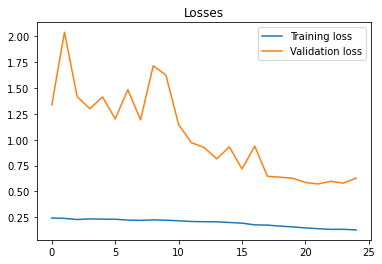

In [30]:
import torch.optim as optim

X_train, X_test, train_loader, val_loader, test_loader_one, scaler = get_data_loader("Sound")

input_dim = len(X_train.columns)
output_dim = 1
hidden_dim = 64
layer_dim = 3
batch_size = 64
dropout = 0.2
n_epochs = 25
learning_rate = 1e-3
weight_decay = 1e-6

model_params = {'input_dim': input_dim,
                'hidden_dim' : hidden_dim,
                'layer_dim' : layer_dim,
                'output_dim' : output_dim,
                'dropout_prob' : dropout}

model = LSTMModel(**model_params)

if torch.cuda.is_available():
   model.to(device)

loss_fn = nn.MSELoss(reduction="mean")
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)


opt = Optimization(model=model, loss_fn=loss_fn, optimizer=optimizer)
opt.train(train_loader, val_loader, batch_size=batch_size, n_epochs=n_epochs, n_features=input_dim)
opt.plot_losses()

predictions, values = opt.evaluate(
    test_loader_one,
    batch_size=1,
    n_features=input_dim
)

### Sound prediction from LSTM

                         value  prediction
Teensy Server Time                        
2021-07-18 05:45:26  76.629997   78.038620
2021-07-18 05:45:27  76.480003   78.030479
2021-07-18 05:45:28  76.870003   78.030479
2021-07-18 05:45:29  77.470001   78.059013
2021-07-18 05:45:30  77.699997   78.090446
...                        ...         ...
2021-07-21 07:10:19  75.750000   71.260048
2021-07-21 07:10:20  80.589996   71.207855
2021-07-21 07:10:21  91.279999   71.194656
2021-07-21 07:10:22  80.080002   69.662697
2021-07-21 07:10:23  78.650002   69.567719

[46278 rows x 2 columns]


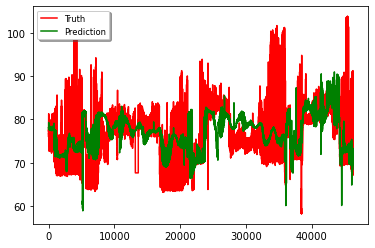

In [31]:
def inverse_transform(scaler, df, columns):
    for col in columns:
        df[col] = scaler.inverse_transform(df[col])
    return df


def format_predictions(predictions, values, df_test, scaler):
    vals = np.concatenate(values, axis=0).ravel()
    preds = np.concatenate(predictions, axis=0).ravel()
    df_result = pd.DataFrame(data={"value": vals, "prediction": preds}, index=df_test.head(len(vals)).index)
    df_result = df_result.sort_index()
    df_result = inverse_transform(scaler, df_result, [["value", "prediction"]])
    return df_result


df_result = format_predictions(predictions, values, X_test, scaler)
print(df_result)
truth = df_result['value'].to_numpy()
prediction = df_result['prediction'].to_numpy()
fig, ax = plt.subplots(1, 1)
c=ax.plot(truth,'r',label='Truth')
c=ax.plot(prediction,'g',label='Prediction')
l = ax.legend(loc='upper left', shadow=True, fontsize='small')

### LSTM Training for PM10 data

[1/25] Training loss: 0.1559	 Validation loss: 0.2568
[2/25] Training loss: 0.1436	 Validation loss: 0.2065
[3/25] Training loss: 0.1371	 Validation loss: 0.1962
[4/25] Training loss: 0.1351	 Validation loss: 0.1755
[5/25] Training loss: 0.1335	 Validation loss: 0.1615
[6/25] Training loss: 0.1323	 Validation loss: 0.1535
[7/25] Training loss: 0.1312	 Validation loss: 0.1502
[8/25] Training loss: 0.1305	 Validation loss: 0.1465
[9/25] Training loss: 0.1296	 Validation loss: 0.1446
[10/25] Training loss: 0.1289	 Validation loss: 0.1440
[11/25] Training loss: 0.1283	 Validation loss: 0.1453
[12/25] Training loss: 0.1279	 Validation loss: 0.1427
[13/25] Training loss: 0.1276	 Validation loss: 0.1428
[14/25] Training loss: 0.1272	 Validation loss: 0.1411
[15/25] Training loss: 0.1272	 Validation loss: 0.1386
[16/25] Training loss: 0.1270	 Validation loss: 0.1379
[17/25] Training loss: 0.1269	 Validation loss: 0.1377
[18/25] Training loss: 0.1266	 Validation loss: 0.1351
[19/25] Training lo

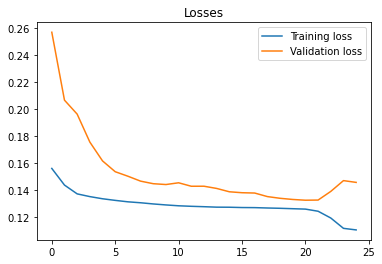

In [32]:
import torch.optim as optim

X_train, X_test, train_loader, val_loader, test_loader_one, scaler = get_data_loader("PM10")

input_dim = len(X_train.columns)
output_dim = 1
hidden_dim = 64
layer_dim = 3
batch_size = 64
dropout = 0.2
n_epochs = 25
learning_rate = 1e-3
weight_decay = 1e-6

model_params = {'input_dim': input_dim,
                'hidden_dim' : hidden_dim,
                'layer_dim' : layer_dim,
                'output_dim' : output_dim,
                'dropout_prob' : dropout}

model = LSTMModel(**model_params)

if torch.cuda.is_available():
   model.to(device)

loss_fn = nn.MSELoss(reduction="mean")
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)


opt = Optimization(model=model, loss_fn=loss_fn, optimizer=optimizer)
opt.train(train_loader, val_loader, batch_size=batch_size, n_epochs=n_epochs, n_features=input_dim)
opt.plot_losses()

predictions, values = opt.evaluate(
    test_loader_one,
    batch_size=1,
    n_features=input_dim
)

### LSTM Predictions for PM10 data

                     value  prediction
Teensy Server Time                    
2021-07-18 05:45:26    2.0    2.791904
2021-07-18 05:45:27    2.0    2.798061
2021-07-18 05:45:28    2.0    2.799396
2021-07-18 05:45:29    2.0    2.780536
2021-07-18 05:45:30    2.0    2.763657
...                    ...         ...
2021-07-21 07:10:19    5.0    5.481672
2021-07-21 07:10:20    5.0    5.440503
2021-07-21 07:10:21    5.0    5.417184
2021-07-21 07:10:22    6.0    6.730332
2021-07-21 07:10:23    6.0    6.803628

[46278 rows x 2 columns]


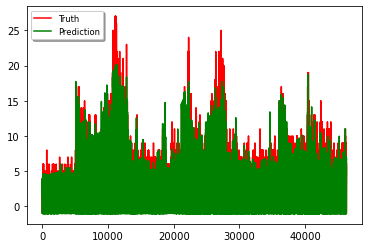

In [33]:
def inverse_transform(scaler, df, columns):
    for col in columns:
        df[col] = scaler.inverse_transform(df[col])
    return df


def format_predictions(predictions, values, df_test, scaler):
    vals = np.concatenate(values, axis=0).ravel()
    preds = np.concatenate(predictions, axis=0).ravel()
    df_result = pd.DataFrame(data={"value": vals, "prediction": preds}, index=df_test.head(len(vals)).index)
    df_result = df_result.sort_index()
    df_result = inverse_transform(scaler, df_result, [["value", "prediction"]])
    return df_result


df_result = format_predictions(predictions, values, X_test, scaler)
print(df_result)
truth = df_result['value'].to_numpy()
prediction = df_result['prediction'].to_numpy()
fig, ax = plt.subplots(1, 1)
c=ax.plot(truth,'r',label='Truth')
c=ax.plot(prediction,'g',label='Prediction')
l = ax.legend(loc='upper left', shadow=True, fontsize='small')

# PART 2 (Unsupervised)

### VAE

In [34]:
from torch.autograd import Variable
import torch.nn.functional as F
def to_var(x):
    return Variable(x)

class VAE(nn.Module):
    def __init__(self, features_size=14, h_dim=400, z_dim=2):
        super(VAE, self).__init__()
       
        self.encoder = nn.Sequential(
            nn.Linear(features_size, h_dim),
            nn.LeakyReLU(0.2),
            nn.Linear(h_dim, z_dim*2)
        )
        self.decoder = nn.Sequential(
            nn.Linear(z_dim, h_dim),
            nn.ReLU(),
            nn.Linear(h_dim, features_size),
            nn.Sigmoid()
        )
    
    def resample(self, mu, logvar):
        std = logvar.mul(0.5).exp_()
        esp = to_var(torch.randn(*mu.size()))
        z = mu + std * esp
        return z
    
    def forward(self, x):
        h = self.encoder(x)
        mu, logvar = torch.chunk(h, 2, dim=1) #split the output of the encoder into mu and logvar
        z = self.resample(mu, logvar)
        return self.decoder(z), mu, logvar

def loss_fn(recon_x, x, mu, logvar):
    BCE = F.binary_cross_entropy(recon_x, x, size_average=False) # data term
    KLD = -0.5 * torch.sum(1 + logvar - mu**2 -  logvar.exp()) # regularization term
    return BCE + KLD



### Create Dataloaders for VAE training

In [35]:
def feature_label_split(df, target_col):
    y = df[[target_col]]
    X = df.drop(columns=[target_col])
    return X, y



AF_Data = AF_Data.reset_index()

X_train, y_train = feature_label_split(AF_Data, "Teensy Server Time")

   # SCALING DATA
scaler = StandardScaler()
X_train_arr = scaler.fit_transform(X_train)

y_train_arr = scaler.fit_transform(y_train)

batch_size = 64

   # CREATING TENSORS
train_features = torch.Tensor(X_train_arr)
train_targets = torch.Tensor(y_train_arr)

train = TensorDataset(train_features, train_targets)

   # CREATING DATALOADERS
train_loader = DataLoader(train, batch_size=batch_size, shuffle=False)



### Training

In [36]:
vae = VAE()
optimizer = torch.optim.Adam(vae.parameters(), lr=1e-3)
epochs = 25
for epoch in range(epochs):
  for idx, (data_in, _) in enumerate(train_loader):
      data_recon, mu, logvar = vae(data_in)
      loss = loss_fn(data_recon, data_in, mu, logvar)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      if idx%1000 == 0:
        print("Epoch[{}/{}] Loss: {:.3f}".format(epoch+1, epochs, loss.data/data_in.shape[0]))

C:\Users\evanb\anaconda3\envs\torch-gpu\lib\site-packages\torch\nn\_reduction.py:42: UserWarning:

size_average and reduce args will be deprecated, please use reduction='sum' instead.



Epoch[1/25] Loss: 9.321
Epoch[1/25] Loss: -188.271
Epoch[1/25] Loss: -239.115
Epoch[1/25] Loss: -420.643
Epoch[1/25] Loss: -511.721
Epoch[1/25] Loss: 191.543
Epoch[1/25] Loss: -152.220
Epoch[1/25] Loss: 37.636
Epoch[2/25] Loss: 166.496
Epoch[2/25] Loss: -282.680
Epoch[2/25] Loss: -456.860
Epoch[2/25] Loss: -302.623
Epoch[2/25] Loss: -527.072
Epoch[2/25] Loss: 221.600
Epoch[2/25] Loss: -204.615
Epoch[2/25] Loss: -38.941
Epoch[3/25] Loss: 266.458
Epoch[3/25] Loss: -250.844
Epoch[3/25] Loss: -402.019
Epoch[3/25] Loss: -310.069
Epoch[3/25] Loss: -511.233
Epoch[3/25] Loss: 174.059
Epoch[3/25] Loss: -216.781
Epoch[3/25] Loss: -16.371
Epoch[4/25] Loss: -89.218
Epoch[4/25] Loss: -376.657
Epoch[4/25] Loss: -336.697
Epoch[4/25] Loss: -270.550
Epoch[4/25] Loss: -523.727
Epoch[4/25] Loss: 173.935
Epoch[4/25] Loss: -136.264
Epoch[4/25] Loss: -18.711
Epoch[5/25] Loss: 316.895
Epoch[5/25] Loss: -256.531
Epoch[5/25] Loss: -393.890
Epoch[5/25] Loss: -330.043
Epoch[5/25] Loss: -169.078
Epoch[5/25] Loss:

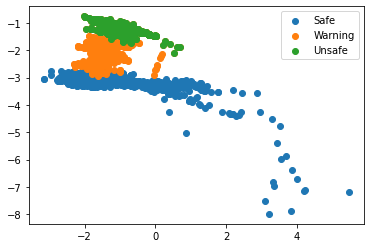

In [37]:
num_display = 2000


display_loader = DataLoader(train, batch_size=num_display, shuffle=False, drop_last=True)
data_in, labels = next(iter(display_loader))
mean = torch.mean(labels)
std = torch.std(labels)
recon_features, mu, logvar = vae(data_in)
mu = mu.detach().cpu()
plt.figure()
legtext = []

classification_num = np.zeros(num_display)

for i in range(3):
  classification = ""
  if i == 0:
    idx = (labels[:,0] < mean)
    classification = "Safe"
  elif i == 1:
    idx = (labels[:,0] >= mean)
    classification_num[(labels[:,0] >= mean)] = 1
    classification = "Warning"
  elif i == 2:
    idx = (labels[:,0] > mean + std)
    classification_num[(labels[:,0] > mean + std)] = 2
    classification = "Unsafe"
  plt.scatter(mu[idx,0],mu[idx,1])
  legtext = np.hstack((legtext,classification))
  plt.legend(legtext)

dates = AF_Data["Teensy Server Time"].to_numpy()


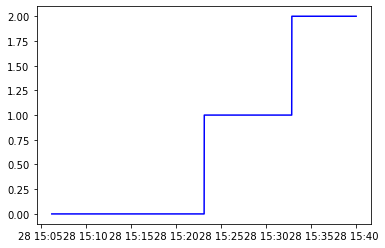

In [38]:
dates = AF_Data["Teensy Server Time"].to_numpy()
plt.plot(dates[:num_display], classification_num, color='blue')